# GWFish Tutorial
This is a brief guide on how to use GWFish software

##  Settings for working in Google Colab
In Google Colab you do not need to download anything locally, and can work online. The only requirement is to have a Google account. Once you have opened this tutorial in Google Colab, uncomment the following lines:

In [1]:
#! pip install -q git+https://github.com/janosch314/GWFish.git
#! pip install -q lalsuite
#! pip install -q corner

**Note**: in Google Colab remember to **restart the kernel runtime** after installation: `runtime -> restart session`

## Settings for working locally with GWFish

### Install GWFish in a `conda` environment
It is advisable to create a `conda` environment where to make the GWFish modules available
```
conda create --name gwfish_env python=3.9
conda activate gwfish_env
```
To make GWFish modules available from any location in your PC, after clonig the repository
```
git clone git@github.com:janosch314/GWFish.git
```
from the folder location, and after activating the `conda` environment, execute the command
```
pip install .
```
The following packages need to be installed as well:
```
pip install lalsuite
pip install corner
pip install tqdm
pip install pandas
pip install tables
pip install json
pip install os
pip install sympy
```
For `numpy` it is preferred to have a version below 2.0; since it is usually automatically installed with the conda environment, the suggestion is to uninstall it if the versione is $\ge 2$ and downgrade it:
```
pip uninstall numpy
pip install numpy==1.25
```

# What is the code about
`GWFish` is a Fisher matrix code, useful to calculate the covariance matrix for a gravitational wave (GW) event in a really small amout of computational time (around seconds). Let's take a step back and briefly recap how parameter estimation (PE) is done in the GW field.

## Starter: GW data analysis
Bayesian gravitational wave data analysis is used to infer the properties of gravitational wave sources and make predictions about their parameters (see below what are in detail the parameters we are talking about). It combines the principles of Bayesian statistics with the analysis of gravitational wave signals detected by ground-based observatories like LIGO and Virgo.

The goal of Bayesian gravitational wave data analysis is to extract this information from the noisy gravitational wave signals detected by the observatories:
$$s(t) = h_0(t) + n(t)$$
where $h_0(t)$ is the true (unknown) signal and $n(t)$ is the detector noise, assumed to be Gaussian and stationary.

Mathematically, Bayes' theorem can be expressed as:

$$p(\vec{\theta}|s) \propto \pi(\vec{\theta}){\mathcal{L}}(s|\vec{\theta})$$

where $p(\vec{\theta}|d)$ is the posterior distribution, ${\mathcal{L}}(d|\vec{\theta})$ is the likelihood function, $\pi(\vec{\theta})$ is the prior distribution, and we neglected the evidence or marginal likelihood at the denominator.

To perform Bayesian gravitational wave data analysis, we use various techniques such as Markov Chain Monte Carlo (MCMC) sampling and nested sampling. The mostly used software is `bilby`, and typically full Baysian parameter estimation is computationally expensive.

## Fisher-matrix approximation

The gravitational-wave likelihood is defined as the probability of noise realization:

$$ {\mathcal{L}}(d|\vec{\theta}) \propto \exp\left[-\frac{1}{2}\langle s - h(\vec{\theta})| s - h(\vec{\theta}) \rangle \right] $$

The inner product $\langle \cdot|\cdot\rangle$ measures the overlap between two signals given the noise characteristics of the detector:

$$ \langle a, b \rangle \equiv 4\operatorname{Re}\int_{f_{\rm min}}^{f_{\rm max}} \frac{\tilde{a}(f)\tilde{b}^*(f)}{S_n(f)}df $$

We can approximate the likelihood by expanding the template around the true signal:

$$ h(\vec{\theta})  = h_0 + \Delta \theta^i h_i$$

so that the likelihood becomes a **multivariarte Gaussian distribution**:

$$ p(\vec{\theta}|s)\propto \pi(\vec{\theta}) \exp\left[-\frac{1}{2}\langle n|n\rangle + \Delta \theta^k\langle n|h_k\rangle - \frac{1}{2}\Delta \theta^i \langle h_i|h_j\rangle \Delta \theta^j \right] $$

1. The truncation in the expansion is done at first-order in partial derivatives, known as **linearized signal approximation** (LSA)
2. LSA approximation is equivalent to the leading term in **posterior expansion as a series in 1/SNR** (this is the reason why Fisher matrix is said to work in high-SNR limit) [see Vallisneri 2008]

In Fisher matrix context we usually work in zero-noise approximation, so that the first two terms cancel and we define the Fisher matrix as:
$$ F_{ij} = \langle h_i|h_j\rangle$$


The Fisher likelihood is therefore simply given by:

$$ {\mathcal{L}} \propto \exp\left[-\frac{1}{2} \left(\vec{\theta} - \vec{\theta}_{\rm inj}\right)^{\rm T} F \left(\vec{\theta} - \vec{\theta}_{\rm inj}\right) \right] $$

The inverse of the Fisher matrix gives us the covariance matrix among parameters:

$$ \sigma_i = \sqrt{\Sigma_{ii}} \ \leftrightarrow  \Sigma_{ij} = \left[F^{-1}\right]_{ij}$$

This is the basic math behind Fisher matrix codes, like `GWFish`

### GW parameters
The parameters describind a GW event are the following (they are already provided with the same nomenclature as used in the code):
- `chirp_mass`: chirp mass of the binary in [Msol] (in detector frame)
- `mass_ratio`: ratio of the secondary mass over the primary mass, so that it ranges in $[0,1]$
- `redshift`: the redshift of the merger
- `luminosity_distance`:  the luminosity distance of the merger in [Mpc]
- `theta_jn`: the angle between the line of observation and the total angular momentum (orbital, spin and GR corrections) of the binary [rad] (it reduces to the so-called inclination angle or iota if the spin component is absent); it ranges in $[0, \pi]$
- `dec`: declination angle in [rad], it varies in $[-\pi/2, +\pi/2]$
- `ra`: right ascension in [rad], it varies in $[0, 2/pi]$
- `psi`: the polarization angle in [rad]; it ranges in $[0, \pi]$
- `phase`: the initial phase of the merger in [rad]; it ranges in $[0, 2\pi]$
- `geocent_time`: merger time as GPS time in [s]; it starts from 1980
- `a_1`: dimensionless spin parameter of primary component; it ranges in $[0, 1]$
- `a_2`: dimensionless spin parameter of secondary component; it ranges in $[0, 1]$
- `tilt_1`: zenith angle between the spin and orbital angular momenta for the primary component in [rad]; it ranges in $[0, \pi]$
- `tilt_2`: zenith angle between the spin and orbital angular momenta for the secondary component in [rad]; it ranges in $[0, \pi]$
- `phi_12`: difference between total and orbital angular momentum azimuthal angles in [rad]; it ranges in $[0, 2\pi]$
- `phi_jl`: difference between the azimuthal angles of the individual spin vector projections on to the orbital plane in [rad]; it ranges in $[0, 2\pi]$
- `lambda_1`: dimensionless tidal polarizabilty of primary component
- `lambda_2`: dimensionless tidal polarizabilty of secondary component

The `lambda_1` and `lambda_2` parameters are for neutron stars only and their value spans from a few hundreds to a thousand.

If $m_1$ and $m_2$ are the individual masses, then the chrip mass is defined as
$$ {\mathcal{M}}_{\rm chirp} = \frac{\left(m_1 m_2\right)^{3/5}}{\left(m_1 + m_2\right)^{1/5}} $$

### **Note on mass conventions**
In `GWFish` the input masses can be passed in the following different combinations (the combination has to be the same when selecting the `fisher_params`):
- `chirp_mass` (in detector-frame and in [Msol]) and `mass_ratio` 
- `chirp_mass_source` (in source-frame and in [Msol]) and `mass_ratio`
- `mass_1` and `mass_2`, both in detector-frame and in [Msol]
- `mass_1_source` and `mass_2_source`, both in source-frame and in [Msol]

Pay attention that when masses are passed to `lal` they are **always** converted into `mass_1` and `mass_2` (in [kg]), as `lal` always takes masses in **detector frame**!


## Why Fisher analysis?
**When studying the performance of a new detector, such as the Einstein Telescope, which has a much improved sensitivity and is predicted to detect entire populations of events ($10^6$ events per years against the current tens that we are detecting), we want a tool to make forecasts in a reasonable amoiunt of time. Since we do not have still a fast full parameter estimation, the Fisher matrix approximation is the state-of-the-art for forecasts.** 

# Let's start!

The implementation of a Fisher matrix code relies on three main pillars:
1. Analytic **waveform approximation**: `GWFish` uses all the waveforms from `lalsimulation` in frequency domain (although it is also possble to work in time domain)
2. **Derivatives**: these are done numerically at the second order (except for some parameters, like distance, phase and time, which are straightforward analytically)
3. **Matrix inversion**: singular value decomposition and normalization is used to safely invert the Fisher matrix

### Import packages

In [2]:
# suppress warning outputs for using lal in jupuyter notebook
import warnings 
warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")

import GWFish.modules as gw
from tqdm import tqdm
import matplotlib
import matplotlib.pyplot as plt
import corner
import numpy as np
import pandas as pd
import json
import os
from astropy.cosmology import Planck18

In [3]:
print(gw.__file__)

/home/josecarlos/Desktop/2025/GWFish2025/GWFish/GWFish/modules/__init__.py


## Single Event Analysis: GW170817-like

# Event's parameters should be passed as Pandas dataframe

ns = 50
one = np.ones((ns,))

z = 4
Planck18.luminosity_distance(z).value

q = 0.75
#Mchirp = np.linspace(42992.3416, 2149617.0789, num=ns) 
#mass_1 = Mchirp * (1/q**2 + 1/q**3)**(1/5)
#mass_2 = Mchirp * (q**3 + q**2)**(1/5)

Mtotal = np.linspace(100000,5000000, num=ns) # 10⁵<Mtot<5x10^6, Mangiagli et al (2022). 
#Mtotal = 4700000
mass_1 = Mtotal/(1 + q)
mass_2 = Mtotal * q/(1 + q)

parameters = pd.DataFrame.from_dict({
    'mass_1': mass_1 * one,
    'mass_2': mass_2 * one,
    'redshift': z*one,
    'luminosity_distance': Planck18.luminosity_distance(z).value *one,
    'theta_jn': 5/6 * np.pi * one,
    'ra': 3.45 * one,
    'dec': -0.41 * one,
    'psi': 1.6 * one,
    'phase': 0,
    'geocent_time': 1187008882 * one, 
#    'a_1': 0.2 * one,
#    'a_2': 0.2 * one,
#    'tilt_1': 1/4 * np.pi * one,
#    'tilt_2': 1/4 * np.pi * one,
})

In [4]:
# Event's parameters should be passed as Pandas dataframe

parameters = {
    'mass_1': np.array([1280000]), 
    'mass_2': np.array([320000]),
    'luminosity_distance': Planck18.luminosity_distance(4).value,
    'theta_jn': np.array([5/6 * np.pi]),
    'ra': np.array([3.45]),
    'dec': np.array([-0.41]),
    'psi': np.array([1.6]),
    'phase': np.array([0]),
    'geocent_time': np.array([1187008882])}
#    'a_1': np.array([0.2]),
#    'a_2': np.array([0.2]),
#    'tilt_1': np.array([1/4 * np.pi]),
#    'tilt_2': np.array([1/4 * np.pi])}
parameters = pd.DataFrame(parameters)
parameters

,mass_1,mass_2,luminosity_distance,theta_jn,ra,dec,psi,phase,geocent_time
0,1280000,320000,36659.047309,2.617994,3.45,-0.41,1.6,0,1187008882


import sys
import importlib

# Add the directory containing your uploaded utilities.py (adjust path if needed)
sys.path.insert(0, "/home/josecarlos/Desktop/2025/GWFish2025/GWFish/GWFish/modules")

# Import the updated file directly
import utilities
importlib.reload(utilities)

In [5]:
# We choose a waveform approximant suitable for BNS analysis
# In this case we are taking into account tidal polarizability effects
#from waveforms import TaylorF2

waveform_model = 'TaylorF2'
maxn_val = 5
f_ref = 1e-4

# Choose the detector onto which you want to project the signal
detector = 'LISA'

#waveform = TaylorF2(data_params={'maxn': maxn_val})
signal, _ = gw.utilities.get_fd_signal(parameters, detector, waveform_model, f_ref, data_params_override={'maxn': maxn_val}) # waveform_model and f_ref are passed together
frequency = gw.detection.Detector(detector).frequencyvector[:, 0]
psd_data = gw.utilities.get_detector_psd(detector)
detectors = ['LISA']
network = gw.detection.Network(detector_ids = detectors, detection_SNR = (0., 0.))
snr = gw.utilities.get_snr(parameters, network, waveform_model, f_ref, data_params_override={'maxn': maxn_val})
fisher_parameters = ['mass_1', 'mass_2', 'luminosity_distance', 'theta_jn', 'dec','ra',
                    'psi', 'phase', 'geocent_time']
detected, network_snr, parameter_errors, sky_localization = gw.fishermatrix.compute_network_errors(
    network = gw.detection.Network(detector_ids = ['LISA'], detection_SNR = (0., 0.)),
    parameter_values = parameters,
    fisher_parameters=fisher_parameters, 
    waveform_model = waveform_model,
    f_ref = 1e-4,
    eps=1e-5,
    eps_mass=1e-5,
    data_params_override = {'maxn': maxn_val},
    )   
    # use_duty_cycle = False, # default is False anyway
save_matrices = True, # default is False anyway, put True if you want Fisher and covariance matrices in the output
save_matrices_path = '/home/josecarlos/Desktop/2025/GWFish2025/GWFish/LISA/population', # default is None anyway,
                                     # otherwise specify the folder
                                     # where to save the Fisher and
                                     # corresponding covariance matrices
data_folder = '/home/josecarlos/Desktop/2025/GWFish2025/GWFish/LISA/population' 
network = gw.detection.Network(detector_ids = ['LISA'], detection_SNR = (0., 0.))
gw.fishermatrix.analyze_and_save_to_txt(network = network,
                                    parameter_values  = parameters,
                                    fisher_parameters = fisher_parameters, 
                                    sub_network_ids_list = [[0]],
                                    #population_name = f'MBHB_Mtotal100500_q075_{maxn_val}PN_rerun',
                                    population_name = f'MBHB_single_TaylorF2_{maxn_val}PN',
                                    waveform_model = waveform_model,
                                    f_ref = 1e-4,
                                    save_path = data_folder,
                                    save_matrices = True,
                                    eps=1e-5,
                                    eps_mass=1e-5,
                                    #decimal_output_format='%.6E'
                                    data_params_override={'maxn': maxn_val}
                                    )

Using TaylorF2 with maxn = 5
Using TaylorF2 with maxn = 5


  0%|                                                     | 0/1 [00:00<?, ?it/s]

Using TaylorF2 with maxn = 4
Using TaylorF2 with maxn = 4
Using TaylorF2 with maxn = 4
Using TaylorF2 with maxn = 4
Using TaylorF2 with maxn = 4
Using TaylorF2 with maxn = 4
Using TaylorF2 with maxn = 4
Using TaylorF2 with maxn = 4
Using TaylorF2 with maxn = 4
Using TaylorF2 with maxn = 4
Using TaylorF2 with maxn = 4
Using TaylorF2 with maxn = 4
Using TaylorF2 with maxn = 4
Using TaylorF2 with maxn = 4
Using TaylorF2 with maxn = 4
Using TaylorF2 with maxn = 4


  0%|                                                     | 0/1 [00:00<?, ?it/s]

Using TaylorF2 with maxn = 4
Using TaylorF2 with maxn = 4
Using TaylorF2 with maxn = 4
Using TaylorF2 with maxn = 4
Using TaylorF2 with maxn = 4
Using TaylorF2 with maxn = 4
Using TaylorF2 with maxn = 4
Using TaylorF2 with maxn = 4
Using TaylorF2 with maxn = 4
Using TaylorF2 with maxn = 4
Using TaylorF2 with maxn = 4
Using TaylorF2 with maxn = 4
Using TaylorF2 with maxn = 4
Using TaylorF2 with maxn = 4
Using TaylorF2 with maxn = 4
Using TaylorF2 with maxn = 4


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.56it/s]


In [6]:
pwd

'/home/josecarlos/Desktop/2025/GWFish2025/GWFish/LISA/population'

In [7]:
fisher_matrix = np.load(data_folder + '/' + f'fisher_matrices_LISA_MBHB_single_TaylorF2_{maxn_val}PN_SNR0.npy')

In [8]:
errors = pd.read_csv(data_folder + '/' + f'Errors_LISA_MBHB_single_TaylorF2_{maxn_val}PN_SNR0.txt', delimiter = ' ')

In [9]:
CORNER_KWARGS = dict(
    bins = 50, # number of bins for histograms
    smooth = 0.99, # smooths out contours. 
    plot_datapoints = True, # choose if you want datapoints
    label_kwargs = dict(fontsize = 12), # font size for labels
    show_titles = True, #choose if you want titles on top of densities.
    title_kwargs = dict(fontsize = 12), # font size for title
    plot_density = False,
    title_quantiles = [0.16, 0.5, 0.84],  # add quantiles to plot densities for 1d hist
    levels = (1 - np.exp(-0.5), 1 - np.exp(-2), 1 - np.exp(-9 / 2.)), # 1, 2 and 3 sigma contours for 2d plots
    fill_contours = True, #decide if you want to fill the contours
    max_n_ticks = 2, # set a limit to ticks in the x-y axes.
    title_fmt=".3f"
    )

In [10]:
corner_lbs = [r'$m_1$ $[M_{\odot}]$', r'$m_2$ $[M_{\odot}]$']

mean_lbs = ['mass_1', 'mass_2']
mean_values = parameters[mean_lbs].iloc[0] # mean values of the parameters
cov_matrix = np.load(data_folder + '/' + f'inv_fisher_matrices_LISA_MBHB_single_TaylorF2_{maxn_val}PN_SNR0.npy')[0, :2, :2]

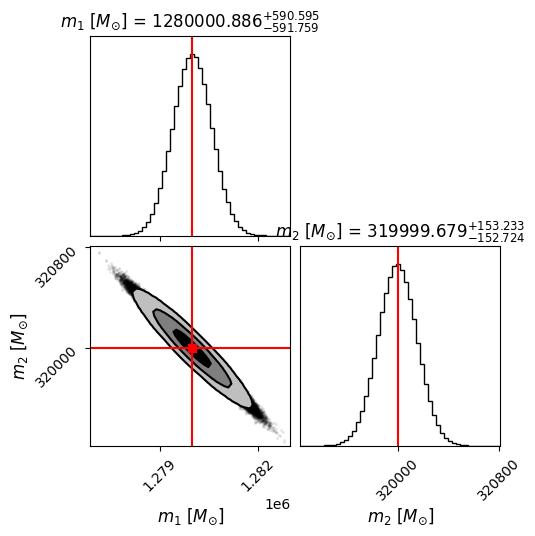

In [11]:
# Sample from a multi-variate gaussian with the given covariance matrix and injected mean values
samples = np.random.multivariate_normal(mean_values, cov_matrix, int(1e6))
fig = corner.corner(samples, labels = corner_lbs, truths = mean_values, truth_color = 'red',
                    **CORNER_KWARGS)
plt.savefig(f"pm1m2_TaylorF2_{maxn_val}PN.pdf", format="pdf", bbox_inches="tight")
plt.show()
plt.close()